<a href="https://colab.research.google.com/github/JagjeevanAK/Machine-Learning/blob/main/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


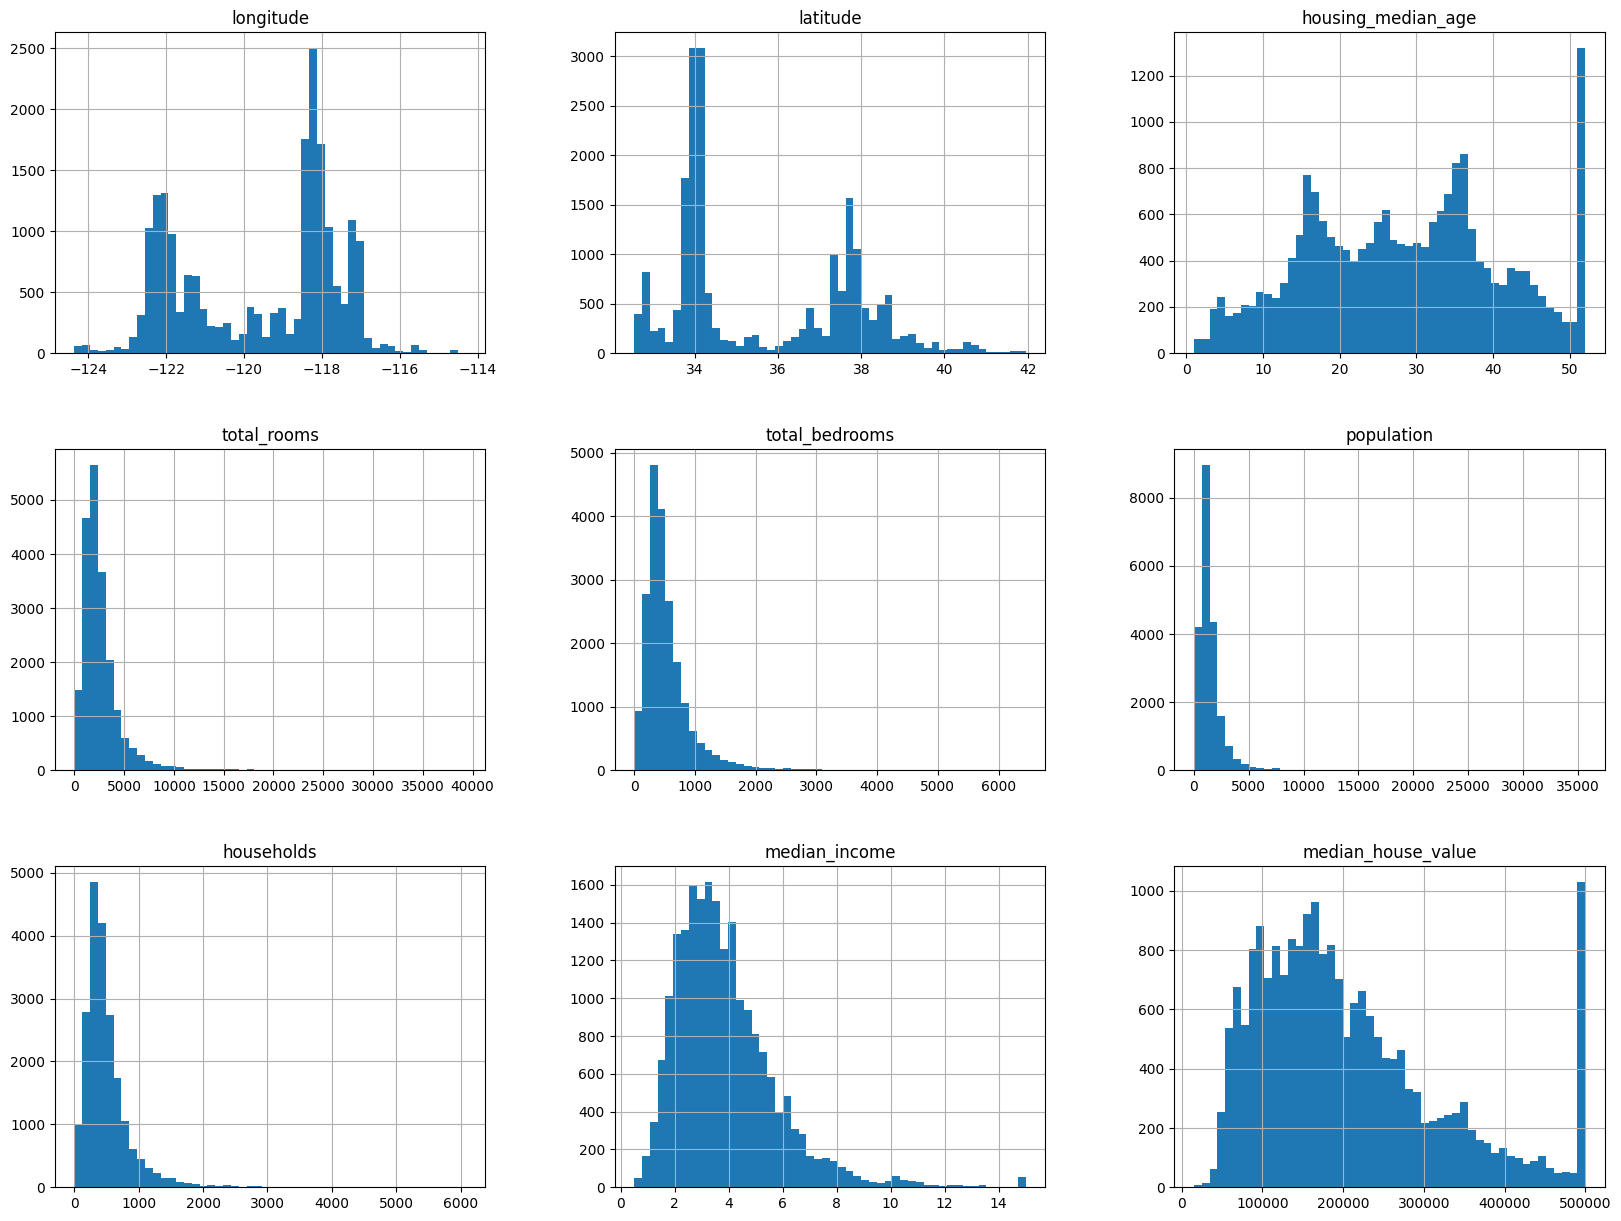

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
# Technique used in production

from zlib import crc32
import numpy as np

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
housing_with_id = housing.copy()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [11]:
housing_with_id.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16


In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., .15 ,3. , 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4, 5])

In [13]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3


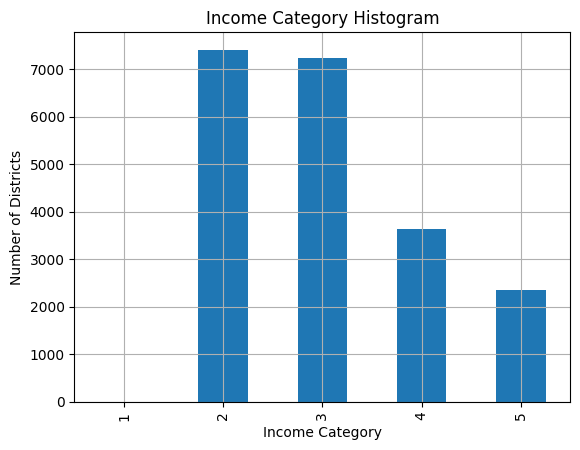

In [14]:
housing['income_cat'].value_counts().sort_index().plot(kind="bar", x="income", y="No. of District", grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.title("Income Category Histogram")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

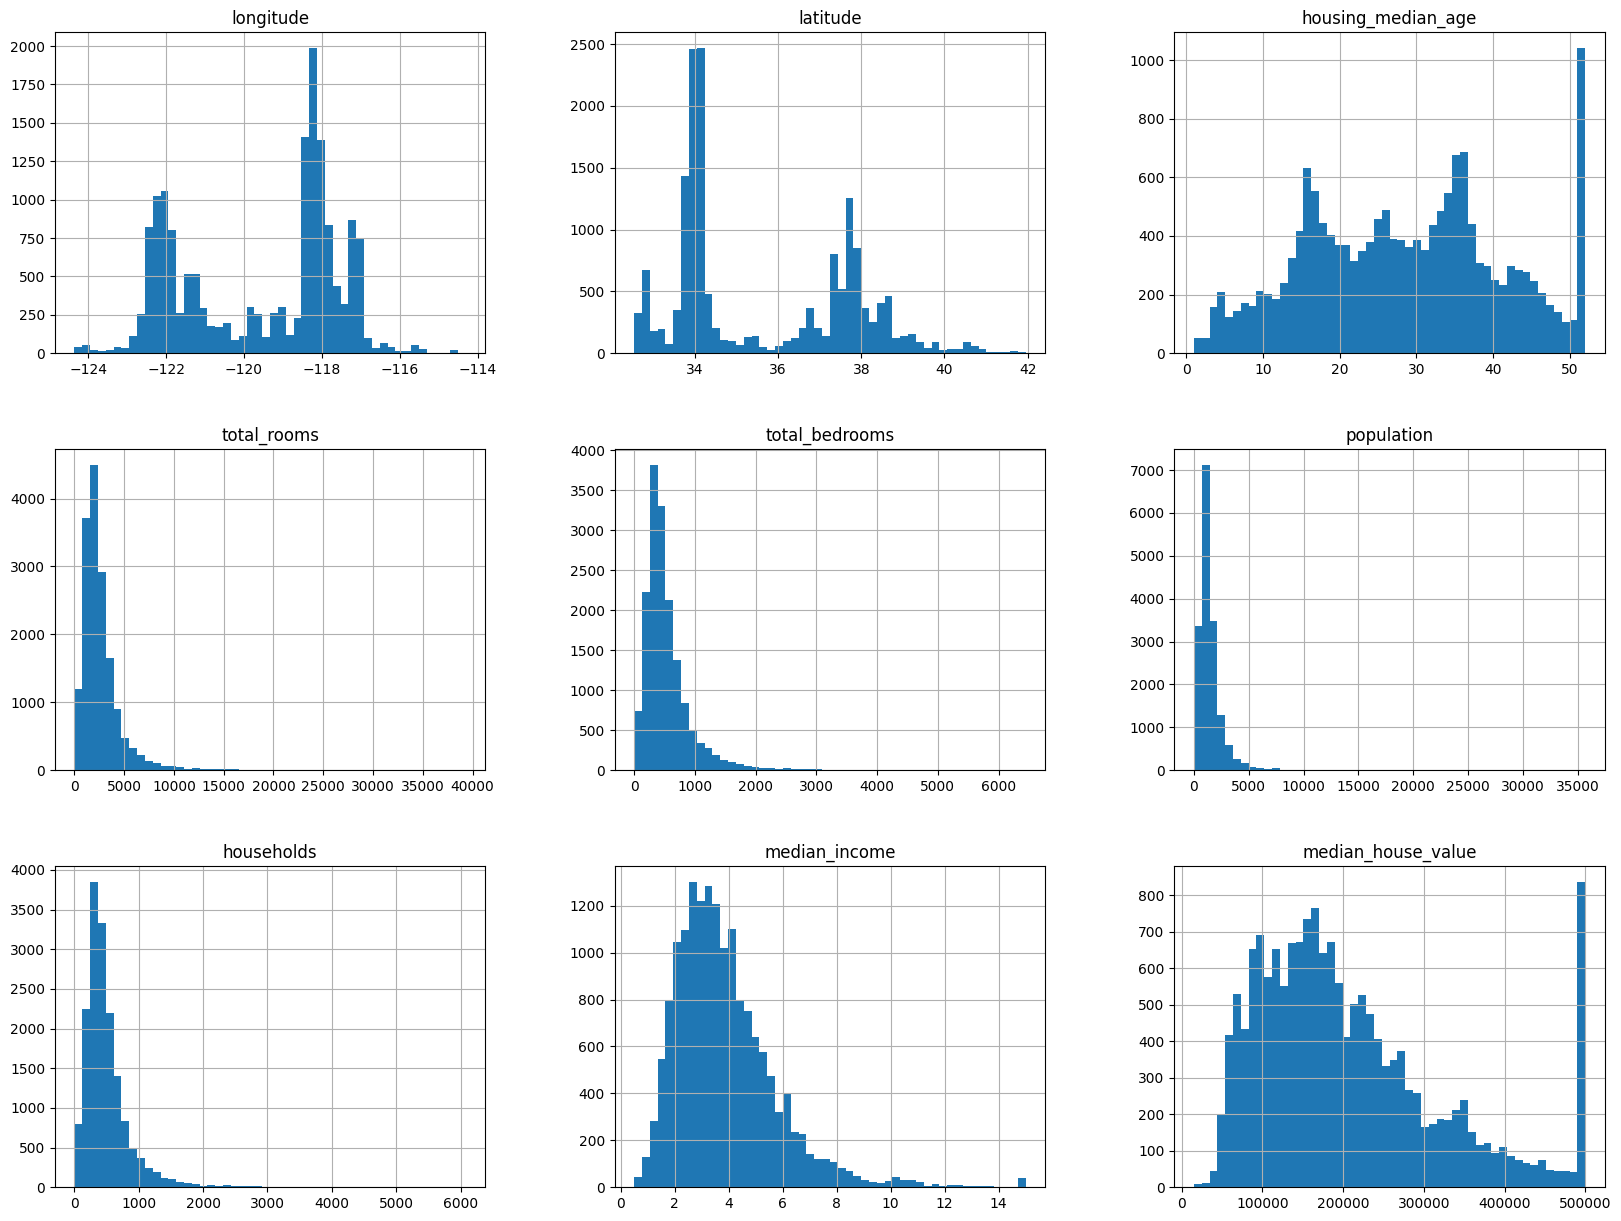

In [16]:
strat_train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", inplace=True, axis=1)

In [18]:
housing = strat_train_set.copy()

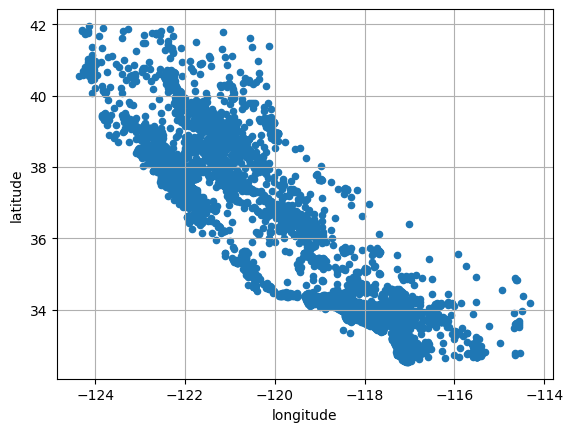

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

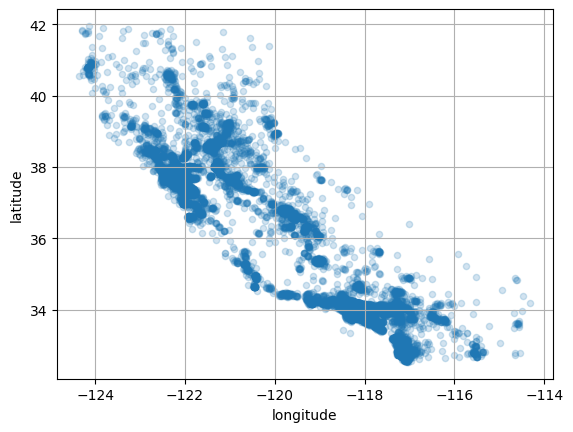

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

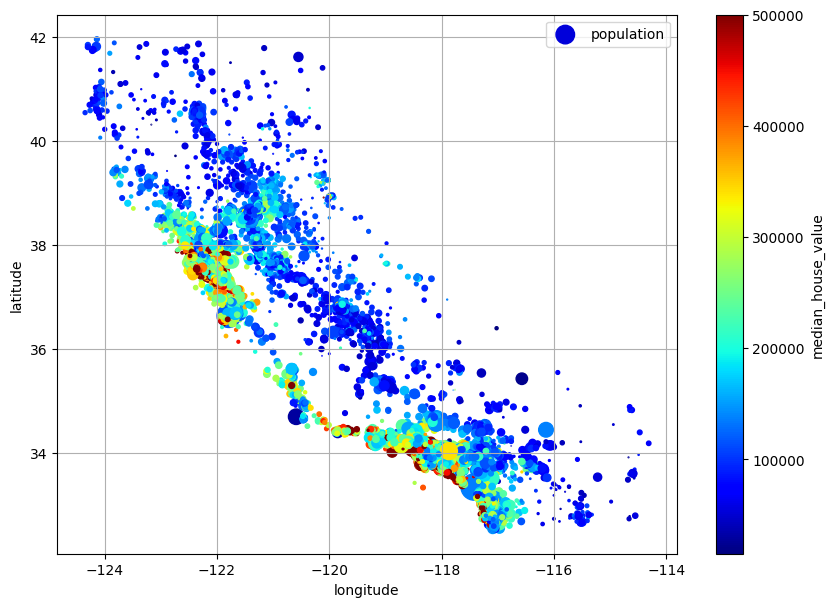

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=1, colorbar=1,
             figsize=(10,7), legend=1, sharex=False, cmap='jet', label='population',
             c='median_house_value', s=housing['population']/100)
plt.show()

In [22]:
corr_matrix = housing.select_dtypes(include="number").corr()

In [23]:
corr_matrix['median_house_value'].sort_values()

,median_house_value
latitude,-0.140978
longitude,-0.048078
population,-0.022393
total_bedrooms,0.052110
households,0.067573
housing_median_age,0.102396
total_rooms,0.134041
median_income,0.689141
median_house_value,1.000000


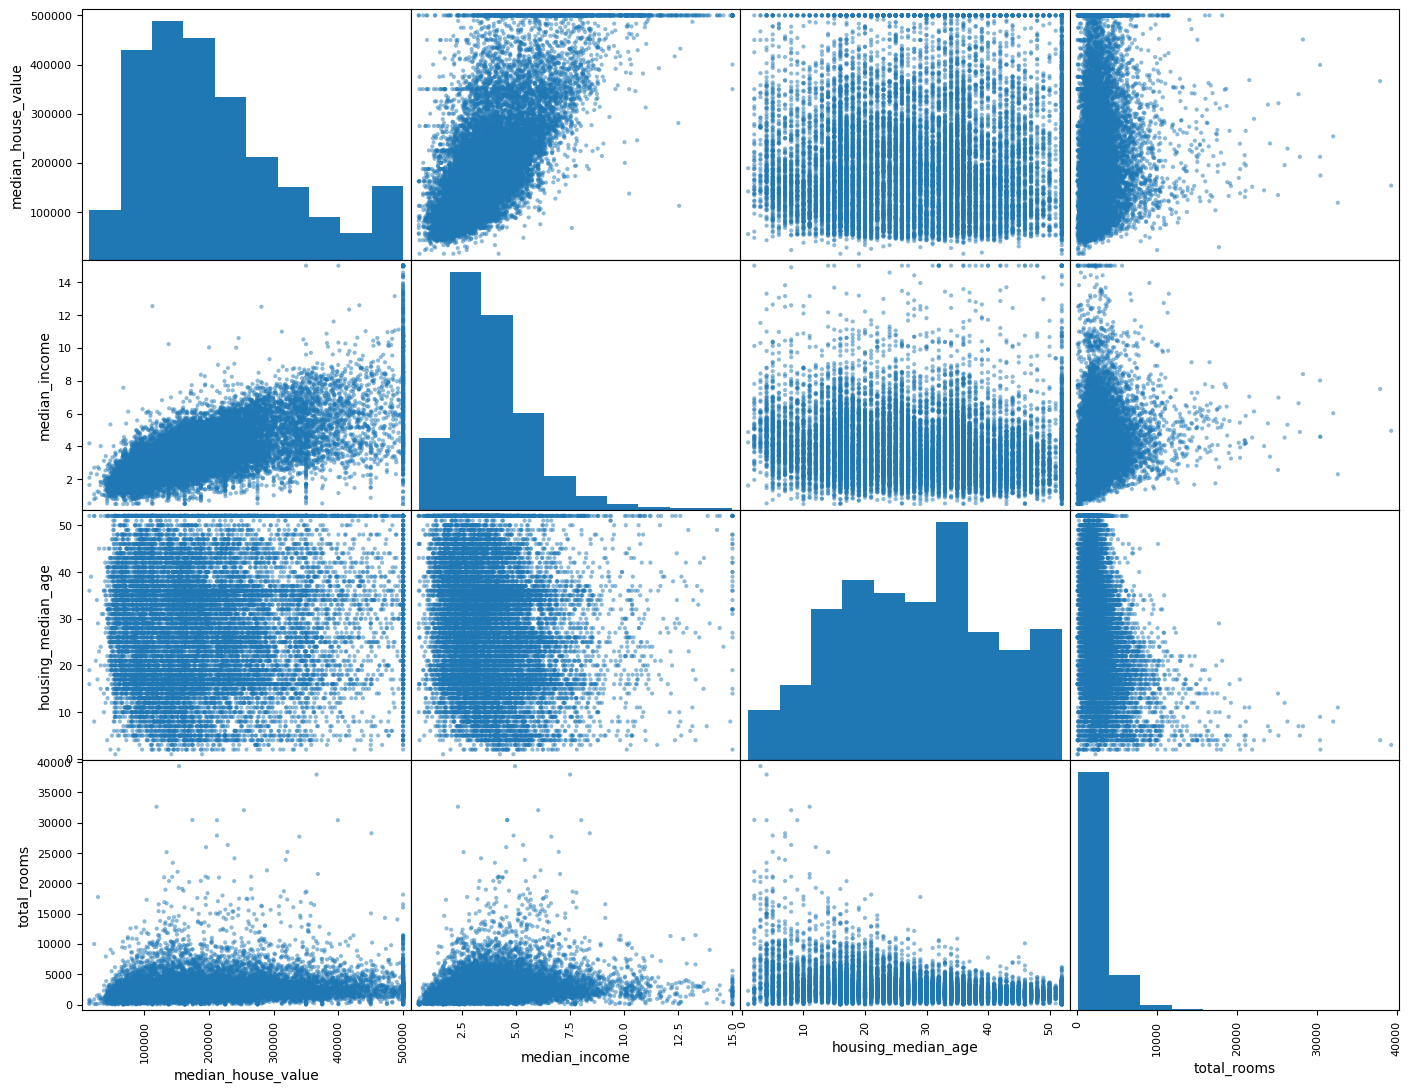

In [24]:
attribute=["median_house_value", "median_income", "housing_median_age", "total_rooms"]
pd.plotting.scatter_matrix(housing[attribute], figsize=(17,13))
plt.show()

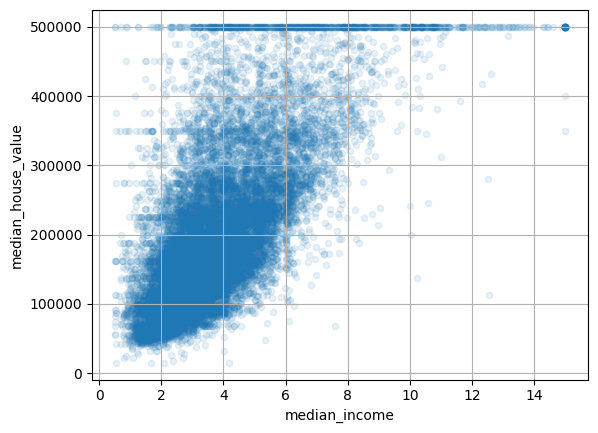

In [25]:
housing.plot(kind="scatter", grid=True, x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [26]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [27]:
corr_matrix = housing.select_dtypes(include="number").corr()
corr_matrix["median_house_value"].sort_values()

,median_house_value
bedrooms_ratio,-0.258672
latitude,-0.140978
longitude,-0.048078
population,-0.022393
people_per_house,-0.019928
total_bedrooms,0.052110
households,0.067573
housing_median_age,0.102396
total_rooms,0.134041
rooms_per_house,0.155641


In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 831 to 1660
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16350 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16350 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [29]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

### Imputation

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [31]:
housing_num = housing.select_dtypes(include = "number")

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2131.    ,  435.    , 1170.    ,
        410.    ,    3.5338])

In [34]:
X = imputer.transform(housing_num)

In [35]:
imputer.strategy

'median'

In [36]:
housing_transform = pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index)
housing_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 831 to 1660
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## Encoding

In [37]:
housing_cat= housing[['ocean_proximity']]

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()

houseing_encoded = ord_encoder.fit_transform(housing_cat)

In [39]:
ord_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()

housing_cat_1hot = hot_encoder.fit_transform(housing_cat)

In [41]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Scaling and Transformation

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scalar = MinMaxScaler(feature_range=(-1,1))
housing_num_scaled = min_max_scalar.fit_transform(housing_num)

In [43]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [44]:
# remainiing stuff

## Pipeline

we can also use `make_pipeline` function form sklearn.pipline  which does not require any names to estimators/ transformers.

In [45]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [46]:
import sklearn

sklearn.set_config(display="diagram")

In [47]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.31,  1.81, -0.45, -0.98, -1.03, -1.01, -1.06, -0.9 ],
       [ 0.62, -0.72,  0.19, -0.91, -0.73, -0.72, -0.71, -1.24]])

In [48]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, index= housing_num.index, columns=num_pipeline.get_feature_names_out())
df_housing_num_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
831,-1.306707,1.814957,-0.445246,-0.984222,-1.033066,-1.012456,-1.058876,-0.896892
11089,0.623248,-0.716300,0.189003,-0.912173,-0.725525,-0.722369,-0.707170,-1.235682
14373,-1.266812,0.849329,0.506128,-0.284447,-0.445942,-0.354579,-0.324659,0.934399
4027,-1.241877,2.307146,-0.920932,0.184322,0.085265,0.054652,0.137436,-0.185439
7075,0.807765,-0.875676,-0.365964,0.589147,0.632782,1.521493,0.750996,0.253706


In [49]:
from sklearn.compose import ColumnTransformer, make_column_selector

num_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

cat_attributes = ["ocean_proximity"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

In [50]:
housing_prepared = preprocessing.fit_transform(housing)

## e-to-e Pipeline for this project

In [51]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [52]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [53]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Model Traning

In [54]:
from sklearn.linear_model import LinearRegression

lin_mod = make_pipeline(preprocessing, LinearRegression())
lin_mod.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d1...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b877bce50>)])),
                ('linearregression', LinearRegression())])

In [55]:
pred = lin_mod.predict(housing)
pred[:5].round(-2)

array([ 60800., 154100., 308200., 124400., 207900.])

In [56]:
housing_label[:5].values

array([ 53000., 200000., 376600., 101000., 191400.])

In [57]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(housing_label, pred)**0.5
rmse

69483.1640955328

In [58]:
from sklearn.tree import DecisionTreeRegressor
d_tree = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

In [59]:
d_tree.fit(housing,housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d1...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b877bce50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
pred = d_tree.predict(housing)
pred[:5]

array([ 53000., 200000., 376600., 101000., 191400.])

In [61]:
housing_label[:5].values

array([ 53000., 200000., 376600., 101000., 191400.])

In [62]:
d_tree_rmse = mean_squared_error(housing_label, pred)**0.5
d_tree_rmse

0.0

## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
tree_cross_val = cross_val_score(d_tree, housing, housing_label, scoring="neg_root_mean_squared_error", cv=10)
tree_cross_val

array([-64788.25884506, -66545.66143886, -64609.40129979, -62414.53667736,
       -66154.59282763, -69040.55588332, -65779.16870323, -68525.73380935,
       -66604.07762978, -65615.38234045])

In [64]:
pd.Series(tree_cross_val).describe()

,0
count,10.000000
mean,-66007.736945
std,1908.012162
min,-69040.555883
25%,-66589.473582
50%,-65966.880765
75%,-64995.039719
max,-62414.536677


In [65]:
from sklearn.ensemble import RandomForestRegressor

r_forest = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
r_forest.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d1...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b877bce50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [66]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
("preprocessing", preprocessing),
("randomforest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {
        'preprocessing__geo__n_clusters':[5, 8, 10],
        'randomforest__max_features':[4, 6, 8]
    },
    {
        'preprocessing__geo__n_clusters':[10, 15],
        'randomforest__max_features':[6, 8, 10]
    }
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_label)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7d1b877bce50>)])),
                                       ('randomforest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'randomforest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'randomforest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [66]:
%%cuda
#include <iostream>

__global__ void hello_cuda() {
    printf("Hello from CUDA GPU thread %d!\n", threadIdx.x);
}

int main() {
    std::cout << "Hello from CPU!" << std::endl;
    hello_cuda<<<1, 10>>>(); // Launch 1 block, 10 threads
    cudaDeviceSynchronize(); // Wait for GPU to finish
    return 0;
}